# Pymaceuticals Inc.
---

### Analysis

Pymaceuticals, Inc. Recently began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.
In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

### Data Cleaning and Overview:

 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


<font color = 'black'>The initial dataset contained information on 249 mice that received treatment for squamous cell carcinoma (SCC) using various drug regimens.</font>

#html tags

In [4]:
# Checking the number of mice.
unique_mice_count = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice: {unique_mice_count}")

Number of unique mice: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate mice by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get the unique Mouse IDs with duplicate entries
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice[duplicate_mice['Mouse ID'] == 'g989']
# Display the duplicate Mouse IDs
print("Duplicate Mouse IDs:")
print(duplicate_mouse_ids)

# Display the data types of columns in the DataFrame
data_types = combined_data.dtypes
print(data_types)

Duplicate Mouse IDs:
['g989']
Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


After removing duplicate timepoints for a mouse ID, a cleaned dataset was obtained.

In [7]:
## Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']
columns_to_display = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 
'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
cleaned_data_display = cleaned_data[columns_to_display]
cleaned_data_display

#cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']
#columns_to_display = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 
#'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
#cleaned_data_display = cleaned_data[columns_to_display]
##print(cleaned_data_display)
#print(cleaned_data_display.to_string(index=False))

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = cleaned_data['Mouse ID'].nunique()
print("Number of unique mice:", num_unique_mice)

Number of unique mice: 248


## Summary Statistics

The summary statistics table provides insights into the performance of different drug regimens in terms of tumor volume.

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the data by 'Drug Regimen' and calculate the required statistics
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better clarity
summary_stats.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'}, inplace=True)

# Display the summary statistics table
#print(summary_stats)
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


The Capomulin regimen exhibited the lowest mean and median tumor volumes, indicating its potential effectiveness in reducing tumor size.

Ramicane also showed promising results with lower mean and median tumor volumes.


In [12]:
### A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
### and SEM of the tumor volume for each regimen (only one method is required in the solution)

### Using the aggregation method, produce the same summary statistics in a single line

### Use the .agg() method to calculate multiple statistics for each regimen
###summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg({'Mean': 'mean', 'Median': 'median', 'Variance': 'var', 'Standard Deviation': 'std', 'SEM': 'sem'})

### Display the summary statistics table

###print(summary_stats)


## A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
## and SEM of the tumor volume for each regimen (only one method is required in the solution)

## Using the aggregation method, produce the same summary statistics in a single line

## Define a custom aggregation function
#def custom_aggregation(series):
#    return pd.Series({
#        'Mean': series.mean(),
#        'Median': series.median(),
#        'Variance': series.var(),
#        'Standard Deviation': series.std(),
#        'SEM': series.sem()
#    })

## Use the custom aggregation function with the .agg() method
#summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(custom_aggregation)

## Display the summary statistics table
#print(summary_stats)


# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Define custom aggregation functions
def mean(series):
    return series.mean()

def median(series):
    return series.median()

def variance(series):
    return series.var()

def std(series):
    return series.std()

def sem(series):
    return series.sem()

# Use the custom aggregation functions with the .agg() method
#summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([mean, median, variance, std, sem])
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Rename the columns for better clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'mean',
    'median': 'median',
    'variance': 'var',
    'std': 'std',
    'sem': 'sem'
})
#summary_stats.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'}, inplace=True)
# Display the summary statistics table
#print(summary_stats)
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

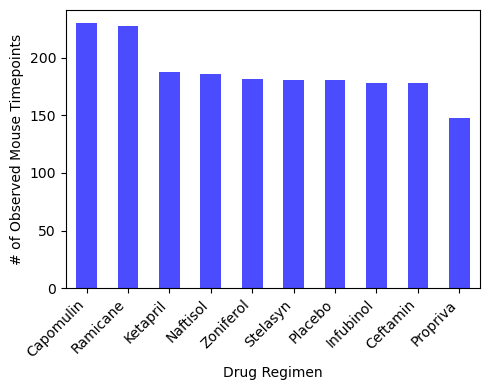

In [90]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

import matplotlib.pyplot as plt

# Group the data by 'Drug Regimen' and count the number of rows in each group
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
regimen_counts.plot(kind='bar', color='blue', alpha=0.7, figsize=(5, 4))

# Set plot title and labels
#plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

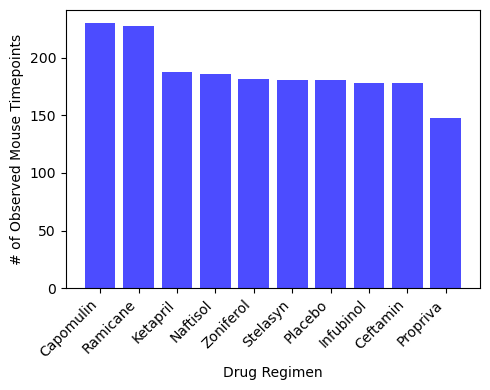

In [91]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Group the data by 'Drug Regimen' and count the number of rows in each group
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Get the drug regimens and their corresponding counts
regimens = regimen_counts.index
counts = regimen_counts.values

# Create a bar plot using pyplot
plt.figure(figsize=(5, 4))
plt.bar(regimens, counts, color='blue', alpha=0.7)

# Set plot title and labels
#plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

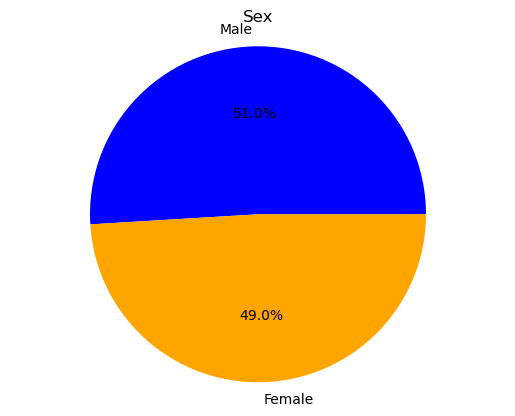

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import matplotlib.pyplot as plt

# Group the data by 'Sex' and count the number of mice in each group
sex_distribution = cleaned_data['Sex'].value_counts()

# Create a pie plot using Pandas
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=0)

# Set plot title and labels
plt.title('Sex')
plt.ylabel('')  # Remove y-axis label

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

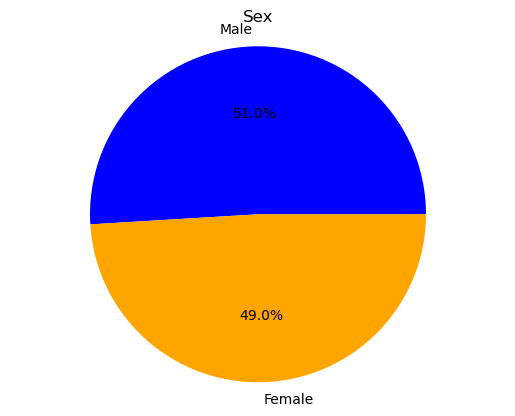

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt

# Group the data by 'Sex' and count the number of mice in each group
sex_distribution = cleaned_data['Sex'].value_counts()

# Create a pie plot using pyplot
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=0)

# Set plot title
plt.title('Sex')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# List of the four treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Merge the last_timepoint Series with the original DataFrame
final_tumor_data = pd.merge(cleaned_data, last_timepoint, on=['Mouse ID', 'Timepoint'])

# Filter the DataFrame to include only the specified treatment regimens
final_tumor_data = final_tumor_data[final_tumor_data['Drug Regimen'].isin(treatment_regimens)]

# Display the DataFrame with the final tumor volume for each mouse
final_tumor_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]
#print(final_tumor_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']])

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
7,u153,0,45.000000,Ceftamin
8,b447,0,45.000000,Ceftamin
10,x226,0,45.000000,Ceftamin
11,t573,0,45.000000,Ceftamin
20,c326,5,36.321346,Infubinol
...,...,...,...,...
234,a644,45,32.978522,Ramicane
240,i177,45,33.562402,Ramicane
243,r944,45,41.581521,Capomulin
244,u364,45,31.023923,Capomulin


Box Plot and Outliers:

Box plots were created to visualize the distribution of tumor volumes for the four most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.

Outliers were identified in the Infubinol regimen, suggesting potential variations in response to this treatment.


In [85]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

    # List of treatment regimens for the loop and plot labels
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for plotting
tumor_vol_data = []

# Loop through each treatment regimen
for regimen in treatment_regimens:
    # Locate the rows for the current regimen and get the tumor volumes
    tumor_volumes = final_tumor_data[final_tumor_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Append the tumor volumes to the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR for the current regimen
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print information about the current regimen
    print(f"Regimen: {regimen}")
    print(f"Potential Outliers: {outliers}\n")

Regimen: Capomulin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Regimen: Ramicane
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Regimen: Infubinol
Potential Outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64

Regimen: Ceftamin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



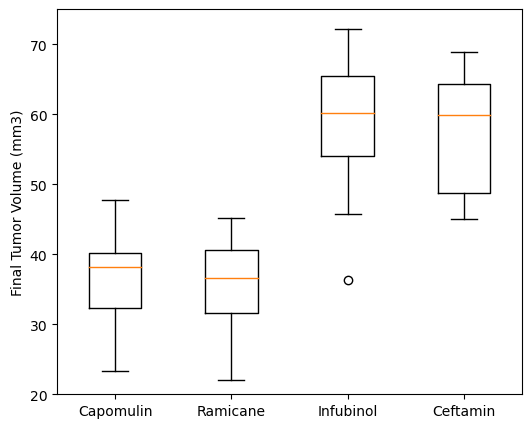

In [86]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(6, 5))
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
#plt.title('Tumor Volume Distribution by Treatment Regimen')
#plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.ylim(20, 75)
#plt.grid(True)
plt.show()

## Line and Scatter Plots

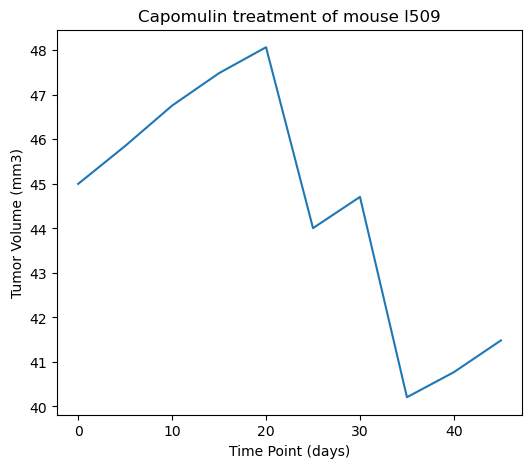

In [87]:
## Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#import matplotlib.pyplot as plt

## Filter data for Capomulin regimen
#capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

## Choose a single mouse (replace 'mouse_id' with the actual Mouse ID)
#mouse_id = 'b128'
#mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

## Plot tumor volume vs. time point
#plt.figure(figsize=(10, 6))
#plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
#plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
#plt.xlabel('Time Point')
#plt.ylabel('Tumor Volume (mm3)')
#plt.grid(True)
#plt.show()

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Choose the mouse l509
mouse_id = 'l509'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Plot tumor volume vs. time point
plt.figure(figsize=(6, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
#plt.grid(True)
plt.show()

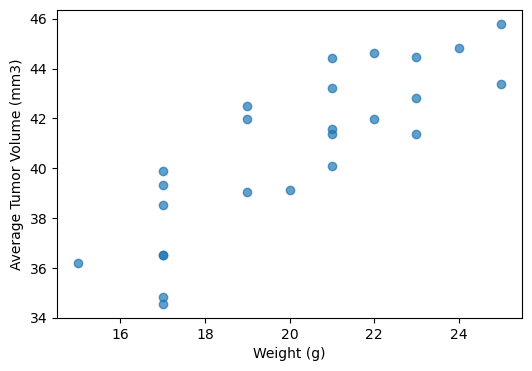

In [88]:
## Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#import matplotlib.pyplot as plt

## Filter data for Capomulin regimen
#capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

## Calculate the average tumor volume for each mouse
#avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

## Merge average tumor volume data with mouse metadata to get weight information
#merged_data = pd.merge(mouse_metadata, avg_tumor_volume, on='Mouse ID')

## Create a scatter plot
#plt.figure(figsize=(10, 6))
#plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_y'], marker='o', alpha=0.7)
#plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
#plt.xlabel('Weight (g)')
#plt.ylabel('Average Tumor Volume (mm3)')
#plt.grid(True)
#plt.show()

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume data with mouse metadata to get weight information
merged_data = pd.merge(mouse_metadata, avg_tumor_volume, on='Mouse ID')

# Create a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', alpha=0.7)
#plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#plt.grid(True)
plt.show()

## Correlation and Regression

A strong positive correlation (0.84) was observed between mouse weight and average observed tumor volume for the Capomulin regimen.

The linear regression model indicated that as mouse weight increases, average tumor volume tends to increase as well.


The correlation between mouse weight and the average tumor volume is 0.841936342469472


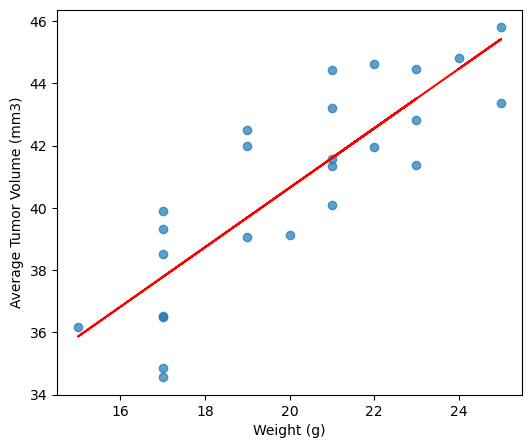

In [70]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume data with mouse metadata to get weight information
merged_data = pd.merge(mouse_metadata, avg_tumor_volume, on='Mouse ID')

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create a scatter plot with linear regression line
plt.figure(figsize=(6, 5))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', alpha=0.7)
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red')
#plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#plt.grid(True)

# Print correlation coefficient and linear regression equation
#print(f"Correlation Coefficient: {correlation_coefficient}")
#print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")
plt.show()

Observations and Inferences:

Capomulin and Ramicane appear to be the most effective treatments in reducing tumor volume, as evidenced by their lower mean and median tumor volumes compared to other regimens.

Infubinol demonstrated higher variability in tumor volume, as indicated by the larger variance and standard deviation. Additionally, potential outliers were detected in this regimen.

There is a strong positive correlation between mouse weight and average tumor volume in the Capomulin regimen, implying that heavier mice tend to have larger tumor volumes.

Overall, the analysis suggests that Capomulin and Ramicane are the most promising treatment options, with lower tumor volumes and potential positive effects on heavier mice. 
However, further investigations are needed to understand the effects of different variables on treatment outcomes and to validate the observed trends.
